In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [29]:
class Projectile:
    
    t0 = 0
    tf = 5

    def __init__(self, v0, angle, k, g=9.81, dt = 0.01):
        self.v0 = v0
        self.angle = angle 
        self.k = k
        self.g = g
        self.dt = dt
        self.vx0 = v0 * np.cos(np.radians(angle))
        self.vy0 = v0 * np.sin(np.radians(angle))
        self.t = np.arange(self.t0, self.tf, self.dt)
        self.x = np.zeros(len(self.t))
        self.y = np.zeros(len(self.t))
        self.vx = np.zeros(len(self.t))
        self.vy = np.zeros(len(self.t))
        
        self.x[0], self.y[0] = 0, 0
        self.vx[0], self.vy[0] = self.vx0, self.vy0


    def calculate_trajectory(self):
        for i in range(1, len(self.t)):
            # 속도의 변화
            dvx = -(self.k * self.vx[i-1]) * self.dt 
            dvy = -(self.g + self.k * self.vy[i-1]) * self.dt 

            # 속도 업데이트
            self.vx[i] = self.vx[i-1] + dvx
            self.vy[i] = self.vy[i-1] + dvy 

            # 위치 업데이트
            self.x[i] = self.x[i-1] + self.vx[i-1] * self.dt
            self.y[i] = self.y[i-1] + self.vy[i-1] * self.dt 

            # 지면에 닿으면 반복 중단
            if self.y[i] < 0:
                break 
        return self.x[:i], self.y[:i]
    

    def plot_trajectory(self):
        x, y = self.calculate_trajectory()
        plt.plot(x, y, label=f'k={self.k}, angle={self.angle}')

    @staticmethod
    def find_optimal_angle(k_values):
        
        # Constant
        angles = np.arange(1, 90, 0.05)

        get_optimal_angle = lambda k: angles[
            np.argmax( 
                [Projectile(20, angle, k).calculate_trajectory()[0][-1] # x[-1]
                    for angle in angles] #Distances
            )   # Get index of maximum distance value
        ]
            
        optimal_angles = [get_optimal_angle(k) for k in k_values]

        return optimal_angles



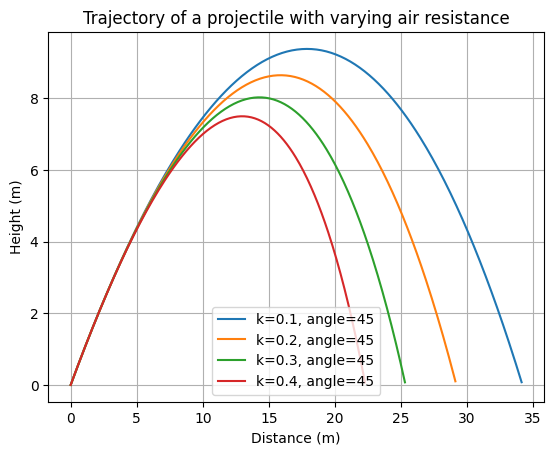

In [30]:
k_values = [0.1, 0.2, 0.3, 0.4]

for k in k_values:
    Projectile(20, 45, k).plot_trajectory()
    
    
plt.title("Trajectory of a projectile with varying air resistance")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
Projectile.find_optimal_angle([0.1, 0.2, 0.3, 0.4])

[42.55000000000004, 40.35000000000004, 38.55000000000003, 36.85000000000003]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


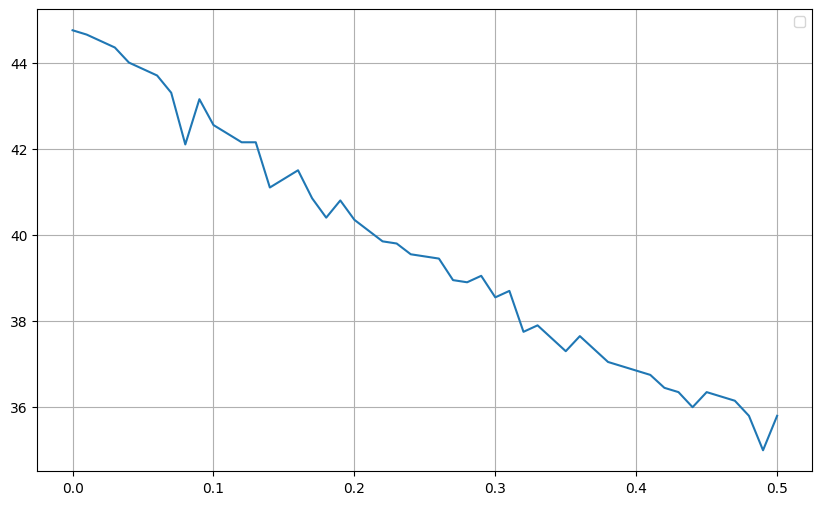

In [37]:
k_values = [k * 0.01 for k in range(51)]

optimal_angles = Projectile.find_optimal_angle(k_values)

plt.figure(figsize=(10, 6))
plt.plot(k_values, optimal_angles)
plt.legend()
plt.grid(True)
plt.show()

$13.28k^2 + -25.55k + 44.95$


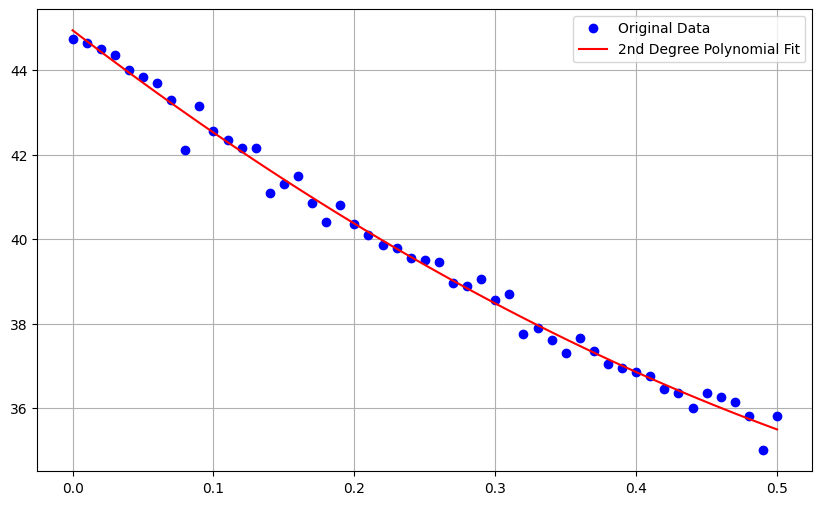

In [44]:
# 2차 다항식으로 근사 
# a*k^2 + b*k + c
coefficients = np.polyfit(k_values, optimal_angles, 2)
polynomial = np.poly1d(coefficients)    # 변수가 하나인(k) 다항식 함수를 생성

# 2차 다항식 수식 포매팅
poly_eq = f"${coefficients[0]:.2f}k^2 + {coefficients[1]:.2f}k + {coefficients[2]:.2f}$"
print(poly_eq)

# 근사 다항식을 사용한 근사값 계산
k_values_fit = np.linspace(min(k_values), max(k_values), 100)
optimal_angles_fit = polynomial(k_values_fit)

# 원본 데이터와 근사 곡선 플롯
plt.figure(figsize=(10, 6))
plt.plot(k_values, optimal_angles, 'o', label='Original Data', color='blue')
plt.plot(k_values_fit, optimal_angles_fit, '-', label='2nd Degree Polynomial Fit', color='red')

plt.legend()
plt.grid(True)
plt.show()